Comparing the TESS lightcurves of EG Uma and CC Cet

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [65]:
search_result = lk.search_lightcurve('CC Cet')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 31,2020,SPOC,20,337219837,0.0
1,TESS Sector 31,2020,SPOC,120,337219837,0.0
2,TESS Sector 31,2020,TESS-SPOC,600,337219837,0.0
3,TESS Sector 42,2021,SPOC,20,337219837,0.0
4,TESS Sector 42,2021,SPOC,120,337219837,0.0


In [66]:
lc1 = search_result[1].download(download_dir='tess/') 

In [44]:
search_result = lk.search_lightcurve('EG UMa')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 15,2019,SPOC,120,416538823,0.0
1,TESS Sector 15,2019,TESS-SPOC,1800,416538823,0.0
2,TESS Sector 15,2019,QLP,1800,416538823,0.0
3,TESS Sector 22,2020,SPOC,120,416538823,0.0
4,TESS Sector 22,2020,TESS-SPOC,1800,416538823,0.0
5,TESS Sector 22,2020,QLP,1800,416538823,0.0


In [45]:
lc2 = search_result[0].downlPG 2257+162oad(download_dir='tess/') 

In [69]:
# lc1.normalize().plot();
# lc2.normalize().plot();
# lc1n = lc1.normalize()
# lc2n = lc2.normalize()

lc1n = lc1.flatten(5001)
# lcn = lcn.normalize(unit='percent')
lc1n.flux = lc1n.flux.value -1
lc1n.flux = lc1n.flux*100
lc1n.flux_err = lc1n.flux_err.value*100


lc2n = lc2.flatten(5001)
# lcn = lcn.normalize(unit='percent')
lc2n.flux = lc2n.flux.value -1
lc2n.flux = lc2n.flux*100
lc2n.flux_err = lc2n.flux_err.value*100

(0.1, 9.9)

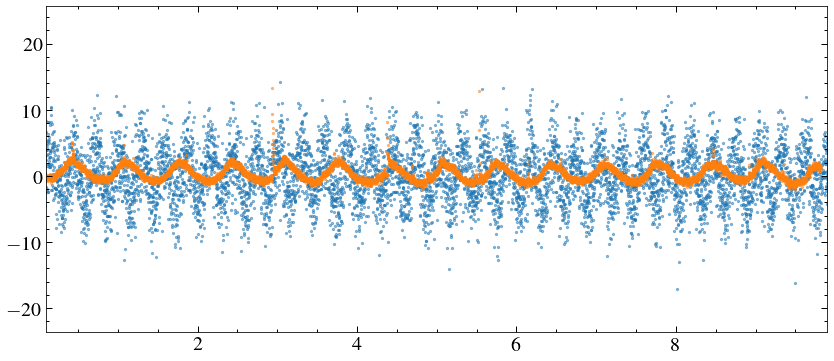

In [70]:
plt.figure(figsize=(14, 6))
plt.scatter(lc1n.time.value-lc1n.time.value[0], lc1n.flux.value, alpha =0.5, s=5)
plt.scatter(lc2n.time.value-lc2n.time.value[0], lc2n.flux.value+0.2, alpha =0.5, s=5)
plt.xlim(0.1, 9.9)
# plt.scatter(lc1n.time, lc1n.flux)

In [62]:
pg1 = lc1n.to_periodogram()
print(pg1.period_at_max_power)

0.25844279786989854 d


In [71]:
import eleanor

In [72]:
from astropy.coordinates import SkyCoord

In [73]:
eleanor.Update(sector=21)

Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 21...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Target Acquired
Cadences Calculated
Quality Flags Assured
CBVs Made
Success! Sector 21 now available.


In [74]:
coords = SkyCoord(ra=130.23712, dec=27.92047, unit=(u.deg, u.deg))

star = eleanor.Source(coords=coords, sector=21)

No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [75]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/david/anaconda3/envs/astroconda/lib/python3.6

100%|██████████| 1266/1266 [00:29<00:00, 42.22it/s]


(0.7, 1.2)

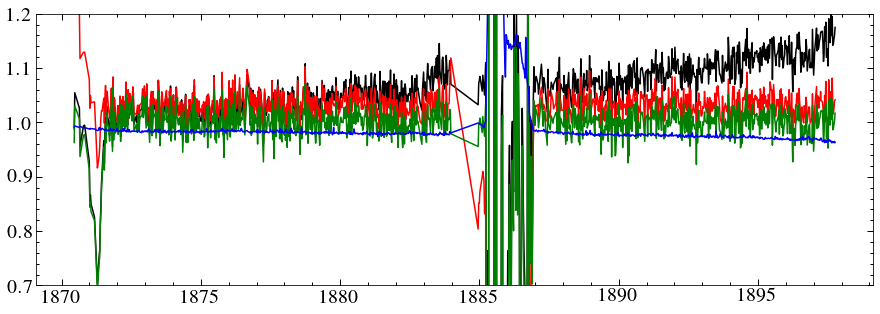

In [80]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylim(0.7, 1.2)

In [84]:
lc3 = data.to_lightkurve()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

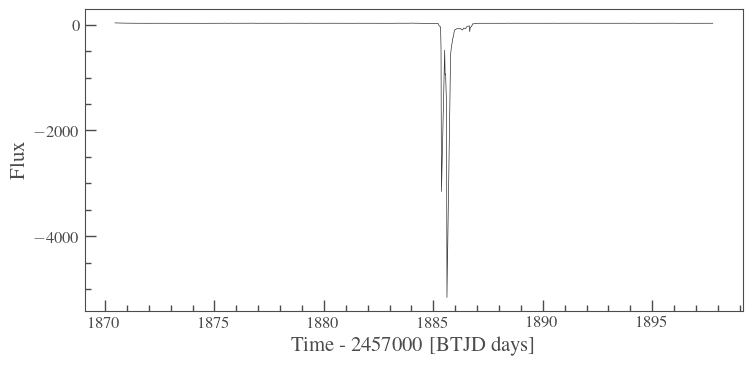

In [85]:
lc3.plot()

In [91]:
lc3n = lc3.flatten(101).remove_nans()
# lcn = lcn.normalize(unit='percent')
lc3n.flux = lc3n.flux.value -1
lc3n.flux = lc3n.flux*100
lc3n.flux_err = lc3n.flux_err.value*100

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


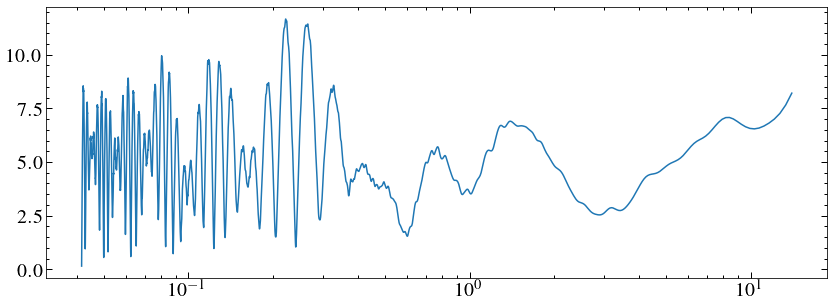

In [96]:
pg3 = lc3n.to_periodogram(oversample_factor=10, minimum_period=1*u.hr, maximum_period=14*u.d)
plt.plot(pg3.period, pg3.power)
plt.xscale('log')

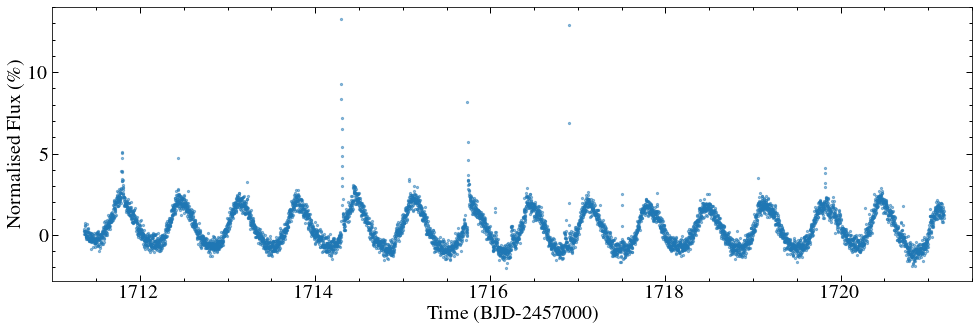

In [103]:

plt.scatter(lc2n.time.value, lc2n.flux.value+0.2, alpha =0.5, s=5)
plt.xlabel('Time (BJD-2457000)')
plt.ylabel('Normalised Flux (\%)')
plt.xlim(1711, 1721.5)
plt.tight_layout()
plt.savefig('plots/ras_tess_eg.png', dpi=150)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

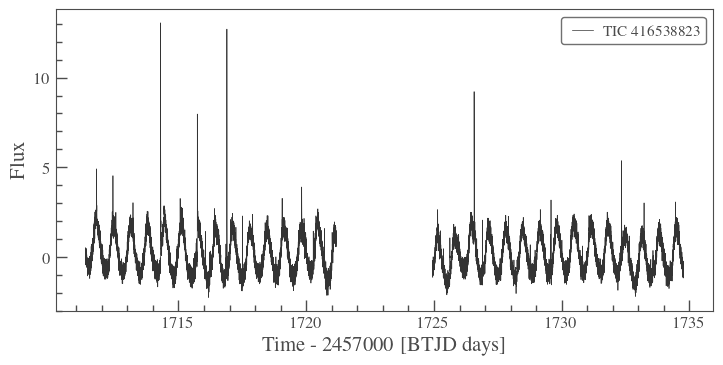